# Download dataset

In [1]:
!gdown 1Vo283GgWpNMUDg-K97L_-IuNP-UH9unh

Downloading...
From: https://drive.google.com/uc?id=1Vo283GgWpNMUDg-K97L_-IuNP-UH9unh
To: /content/Diabetes-dataset.zip
100% 9.13k/9.13k [00:00<00:00, 18.9MB/s]


In [2]:
%mkdir -p data
!unzip -q Diabetes-dataset.zip -d data

# Load dataset using pandas

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Information about dataset attributes:

Pregnancies: To express the Number of pregnancies

Glucose: To express the Glucose level in blood

BloodPressure: To express the Blood pressure measurement

SkinThickness: To express the thickness of the skin

Insulin: To express the Insulin level in blood

BMI: To express the Body mass index

DiabetesPedigreeFunction: To express the Diabetes percentage

Age: To express the age

Outcome: To express the final result 1 is Yes and 0 is No

In [4]:
diabetes = pd.read_csv("data/diabetes.csv")
df = diabetes.copy()
df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


# Analysis

In [15]:
def display_normal_barchart(dataframe, col_name):
    sns.countplot(x=dataframe[col_name], palette='viridis')
    plt.show(block=True)

def display_barchart_byRatio(dataframe, col_name, split=10):

    # Get Max, Min value
    df = dataframe[col_name]
    min_value = df.min()
    max_value = df.max()

    bins = np.linspace(min_value, max_value, split + 1)  # 11 points create 10 equal bins
    labels = [f'{int(bins[i])}-{int(bins[i+1])}' for i in range(len(bins)-1)]

    # Assign numbers to bins
    df['Segment'] = pd.cut(df, bins=bins, labels=labels, include_lowest=True)

    # Count the frequency of each segment
    segment_counts = df['Segment'].value_counts().sort_index()

    # Plot the bar chart
    plt.figure(figsize=(10, 6))
    plt.bar(segment_counts.index, segment_counts.values, width=0.8, color='skyblue', edgecolor='black')

    # Set the labels and title
    plt.xlabel(col_name)
    plt.ylabel('Frequency')
    plt.title(f'Distribution of {col_name} into Segments')

    # Rotate the x-tick labels for better readability
    plt.xticks(rotation=45)

    # Add grid lines for better readability
    plt.grid(axis='y', linestyle='--', alpha=0.7)

    # Show the plot
    plt.show(block=True)

<ipython-input-15-b80e969d79ec>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=dataframe[col_name], palette='viridis')


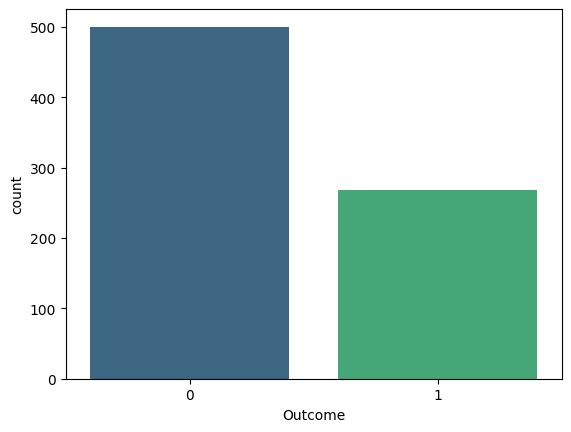

In [18]:
display_normal_barchart(df, 'Outcome')

<ipython-input-15-b80e969d79ec>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=dataframe[col_name], palette='viridis')


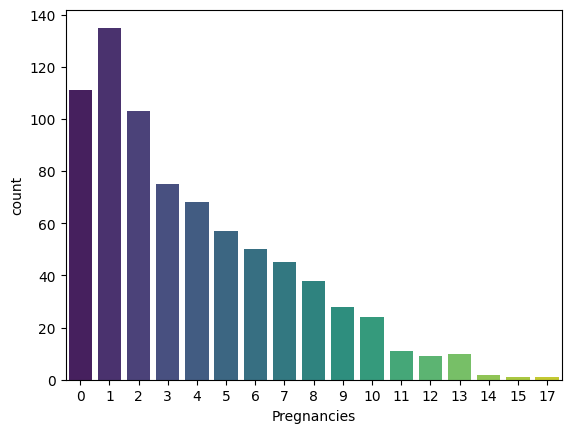

In [17]:
display_normal_barchart(df, 'Pregnancies')

<ipython-input-15-b80e969d79ec>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Segment'] = pd.cut(df, bins=bins, labels=labels, include_lowest=True)


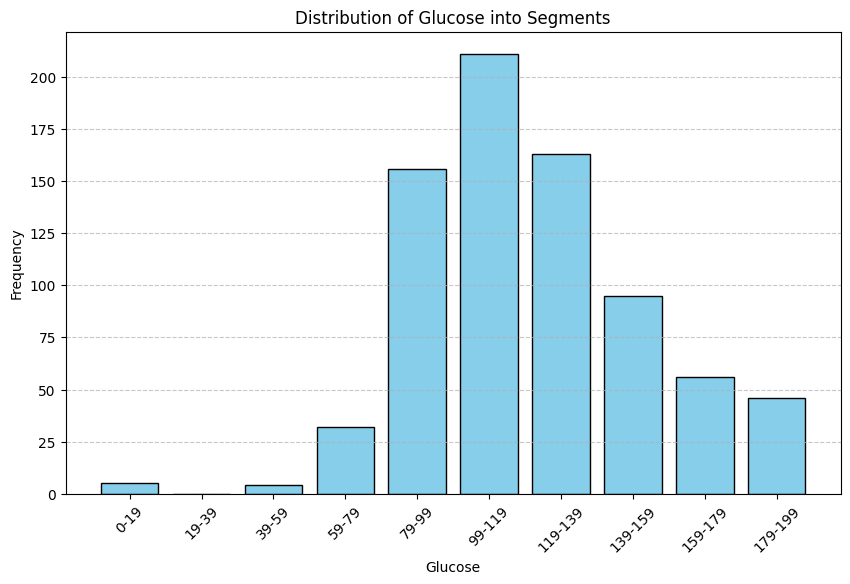

In [19]:
display_barchart_byRatio(df, 'Glucose')

Missing value

In [ ]:
df.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [20]:
# Checking the zero-values
zero_columns = [col for col in df.columns if (df[col].min() == 0 and col not in["Outcome", "Pregnancies"])]
for col in zero_columns:
    df[col] = np.where(df[col] == 0, np.nan, df[col])

In [21]:
df.isnull().sum()

,0
Pregnancies,0
Glucose,5
BloodPressure,35
SkinThickness,227
Insulin,374
BMI,11
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [22]:
def fill_na_with_median(dataframe):
    dataframe = dataframe.apply(lambda x: x.fillna(x.median()) if x.dtype not in ["category", "object", "bool"] else x, axis=0)
    return dataframe

df = fill_na_with_median(df)

In [23]:
df.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [24]:
df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,125.0,33.6,0.627,50,1
1,1,85.0,66.0,29.0,125.0,26.6,0.351,31,0
2,8,183.0,64.0,29.0,125.0,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1
5,5,116.0,74.0,29.0,125.0,25.6,0.201,30,0
6,3,78.0,50.0,32.0,88.0,31.0,0.248,26,1
7,10,115.0,72.0,29.0,125.0,35.3,0.134,29,0
8,2,197.0,70.0,45.0,543.0,30.5,0.158,53,1
9,8,125.0,96.0,29.0,125.0,32.3,0.232,54,1


# Training

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [ ]:
target = "Outcome"
X = df.drop(target, axis=1)
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
acc_train = accuracy_score(y_train, rf_model.predict(X_train))
acc_test = accuracy_score(y_test, rf_model.predict(X_test))

print(20*"#", "Accuracy & Results", 20*"#")
print("Accuracy Train : ", "%.3f" % acc_train)
print("Accuracy Test : ", "%.3f" % acc_test)

#################### Accuracy & Results ####################
Accuracy Train :  1.000
Accuracy Test :  0.753


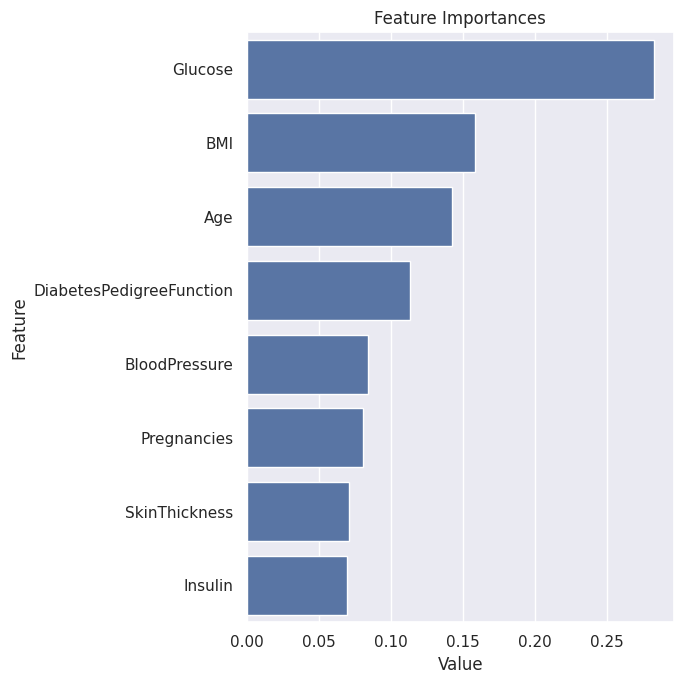

In [ ]:
feature_imp = pd.DataFrame({'Value' : rf_model.feature_importances_, 'Feature': X.columns})
plt.figure(figsize=(7,7))
sns.set(font_scale=1)
sns.barplot(x='Value', y='Feature', data=feature_imp.sort_values(by='Value', ascending=False))
plt.title('Feature Importances')
plt.tight_layout()
plt.show()